**libraries to use**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from keras.layers import SimpleRNN
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers
import os
import pickle
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import regularizers
from matplotlib import rcParams
import seaborn as sns
from PIL import Image
from transformers import AutoTokenizer



**mount google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**load dataset**

In [ ]:
dataset1 = pd.read_csv('/content/drive/MyDrive/ML_Assignments/ML_Project/news.csv')
dataset1

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
dataset1.shape

(6335, 4)

In [ ]:
dataset1.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [ ]:
dataset1['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
mapping = {'REAL': 1, 'FAKE':0}
dataset1['label'] = dataset1['label'].map(mapping)
dataset1

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [ ]:
# Detecting data
def news(content):
  blob = TextBlob(content)
  label = blob.sentiment.polarity
  if label > 0:
    result = "REAL"
  else:
    result = "FAKE"
  return result

In [ ]:
news("Under its Covid-specific policy, Twitter operated a five-strike system for accounts posting demonstrably false or misleading content that may lead to significant risk of harm such as exposure to Covid or damage to public health systems.")

'FAKE'

In [ ]:
tfidf_vec = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vec

TfidfVectorizer(max_df=0.7, stop_words='english')

In [ ]:
y = dataset1["label"].values
X = dataset1["text"]

In [ ]:
labels = dataset1.label.copy()
news = dataset1.text.copy()
labels

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(news, labels, test_size=0.2, random_state=1, stratify=labels)

In [ ]:
news = tfidf_vec.fit_transform(news)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
news = cv.fit_transform(X)

**Passive Aggressive Classifiaction**

In [ ]:
pac = PassiveAggressiveClassifier()

In [ ]:
pac.fit(x_train, y_train)

PassiveAggressiveClassifier()

In [ ]:
y_pred = pac.predict(x_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
score

0.9163378058405682

**predicting data from the given dataset**

In [ ]:
X_new = x_test[600]
prediction = pac.predict(X_new)
print(prediction)
if(prediction[0] == 1):
  print('This is real')
else:
  print('This is fake')


[1]
This is real


In [ ]:
print(y_pred[600])

1


In [ ]:
def pred_news(txt,classifier):
  vect = cv.transform(txt).toarray()
  print(vect)
  prediction = pac.predict(vect)
  print(prediction)
  return prediction

In [ ]:
str = "Mr Ustenko, who advises President Zelensky on economic affairs, has written to BP's chief executive, Bernard Looney, urging him to set out a plan to ensure his business does not profit from the war."
str1 = [str]
pred_news(str1,pac)

[[0 0 0 ... 0 0 0]]
[1]


array([1])

**Data preprocessing**

In [ ]:
# 3
import numpy as np
import pandas as pd
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import re
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
swords = stopwords.words('english')

In [ ]:
import nltk
nltk.download('omw-1.4')

def preprocess(sentence):
    tweet = re.sub(r"@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', sentence)

    # remove all single characters
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)

    # Substituting multiple spaces with single space
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)

    # Converting to Lowercase
    tweet = tweet.lower()

    # Lemmatization
    tweet = tweet.split(' ')
    tweet = [word for word in tweet if word not in swords]
    tweet = [stemmer.lemmatize(word) for word in tweet]
    tweet = ' '.join(tweet)
    return tweet

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
dataset1['text'] = dataset1['text'].apply(preprocess)

In [ ]:
dataset1.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,u secretary state john kerry said monday stop ...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november 9 2016 lesson...,0
4,875,The Battle of New York: Why This Primary Matters,primary day new york front runner hillary clin...,1


In [ ]:
y = dataset1["label"].values
X = dataset1["text"]

In [ ]:
# 3.2
max_features = 1000
maxlen = 100

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

**Text vectorization**

In [ ]:
from tensorflow.keras import layers
text_vectorization = layers.TextVectorization (max_tokens=max_features, output_mode="int", output_sequence_length=maxlen)
text_vectorization.adapt(X)
X_train = text_vectorization(X_train)
X_test = text_vectorization(X_test)

In [ ]:
text = text_vectorization.get_vocabulary()
import pickle 
with open('/content/drive/MyDrive/Colab Notebooks/text.pickle', 'wb') as f:
  pickle.dump(text, f)

with open('/content/drive/MyDrive/Colab Notebooks/X_train.pickle', 'wb') as f:
  pickle.dump(X_train,f)

with open('/content/drive/MyDrive/Colab Notebooks/X_test.pickle', 'wb') as f:
  pickle.dump(X_test,f)

with open('/content/drive/MyDrive/Colab Notebooks/y_train.pickle', 'wb') as f:
  pickle.dump(y_train,f)

with open('/content/drive/MyDrive/Colab Notebooks/y_test.pickle', 'wb') as f:
  pickle.dump(y_test,f)



In [ ]:
# 4
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/text.pickle', 'rb') as f:
  vocabulary = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/X_train.pickle', 'rb') as f:
  X_train = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/X_test.pickle', 'rb') as f:
  X_test = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/y_train.pickle', 'rb') as f:
  y_train = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/y_test.pickle', 'rb') as f:
  y_test = pickle.load(f)

In [ ]:
print(len(X_train))
print(len(X_test))
print(y_train)
print(y_test)

4434
1901
[1 1 0 ... 1 0 1]
[0 1 0 ... 1 1 1]


**Array to staore the results of models**

In [ ]:
performances =[]

**Simple RNN**

In [ ]:
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers

model = Sequential()
model.add(Embedding(max_features, maxlen))
model.add(layers.Bidirectional(SimpleRNN(32)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Simple RNN"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)

Epoch 1/30
32/32 [==============================] - 16s 287ms/step - loss: 0.5728 - acc: 0.7168 - val_loss: 0.4751 - val_acc: 0.7860
Epoch 2/30
32/32 [==============================] - 8s 246ms/step - loss: 0.3061 - acc: 0.8784 - val_loss: 0.2221 - val_acc: 0.8986
Epoch 3/30
32/32 [==============================] - 8s 246ms/step - loss: 0.2319 - acc: 0.9113 - val_loss: 0.2543 - val_acc: 0.8851
Epoch 4/30
32/32 [==============================] - 8s 245ms/step - loss: 0.1913 - acc: 0.9306 - val_loss: 0.1964 - val_acc: 0.9189
Epoch 5/30
32/32 [==============================] - 8s 245ms/step - loss: 0.1686 - acc: 0.9391 - val_loss: 0.2051 - val_acc: 0.9144
Epoch 6/30
32/32 [==============================] - 8s 238ms/step - loss: 0.1454 - acc: 0.9446 - val_loss: 0.2107 - val_acc: 0.9077
Epoch 7/30
32/32 [==============================] - 8s 241ms/step - loss: 0.1043 - acc: 0.9649 - val_loss: 0.1954 - val_acc: 0.9279
Epoch 8/30
32/32 [==============================] - 8s 240ms/step - loss: 0

**loading performances**

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Simple RNN', 0.8942661756970016, 0.8891191709844559, 0.9012605042016807, 0.8951486697965572]]


**visualization with simple RNN**

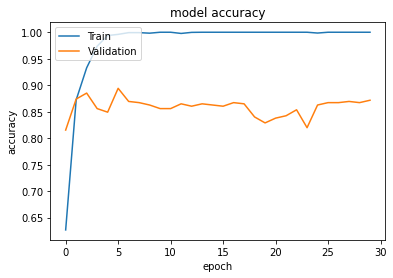

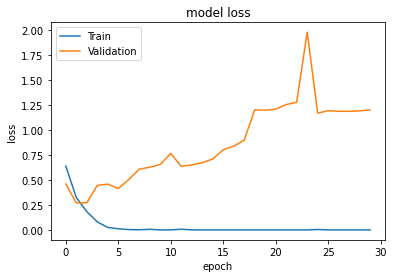

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**predict method with text data either real or fake**

In [ ]:
def predict_news_status(txt, model):
    txt = preprocess(txt) 
    txt = text_vectorization(pd.DataFrame([[txt]]))
    prob = model.predict(txt)[0][0]
    print(prob)
    return 'Real' if prob >= 0.5 else 'Fake'

In [ ]:
str1 = X[184]
# str1 = [str]
predict_news_status(str1,model)

1/1 [==============================] - 0s 27ms/step
0.9999999


'Real'

In [ ]:
news_str = '''
The Afghan Charge Affaires was summoned to foreign ministry, to convey Islamabad's “deep concern and anguish” over the attack on Pakistans Head of Mission in Kabul.

It was underscored that perpetrators of this attack must be apprehended and brought to justice urgently, and an investigation be launched into the serious breach of security of the embassy premises.

It was also emphasized that all necessary steps be taken to ensure security of the diplomatic premises, officers and staff working in Pakistans Mission in Kabul and consulates in Jalalabad, Kandahar, Herat and Mazar-i-Sharif.

Responding to Pakistans call for apprehending the perpetrators and launching an investigation, the Afghan diplomat said the security of Pakistani diplomatic missions has already been beefed up.

He assured that the Afghan authorities would leave no stone unturned in bringing the perpetrators of this dastardly act to justice.
Meanwhile, the Pakistani security guard Israr Mohammad was flown back to Peshawar after he was critically injured in the attack.

Foreign Office Spokesperson Mumtaz Zahra Baloch, while responding to a media query regarding attack on Pakistan Embassy in Kabul said Pakistan has no plans to close its embassy in Kabul or withdraw its diplomats.

She said the government is in contact with Afghan interim authorities and enhanced security measures are being taken to protect Pakistani diplomatic personnel and Missions in Afghanistan.
'''

In [ ]:
news_str2 = '''
Appearing on Geo News show ‘Aaj Shahzeb Khanzada Kay Sath’, the finance minister was questioned about the delayed arrival of the IMF team to which he said: “I don’t care if they come. I don’t have to plead before them. I have to look at Pakistan’s matters.”

He added that the IMF team was “most welcome” to come and the government was dealing with it on a weekly basis.

“Our ninth review is totally in order. Everything is in order and under normal circumstances … I have reassured them that our ninth review is in order and you should come and give Pakistan the $500 million funds,” Dar said.

He said the IMF could “not dictate” the government. “If they don’t come then we will manage — no problem,” Dar added.

Pushed back on the implications of his approach, the finance minister acknowledged that he agreed with the potential fallout of a breakdown in IMF talks and said that was why he was talking to the body for the country’s sake.

“I know how to complete the [IMF] programme,” the finance minister maintained, stressing that the government would complete the current programme as well.

Dar said that in his talks with the IMF, he told the Fund that it should strike deals keeping in mind that the government could not further burden the people. Dar said he had told the IMF that it was “behaving abnormally” in regard to dealing with Pakistan.

“I have never taken dictation and never will from these institutions, I have to look after Pakistan’s interests,” the finance minister reiterated.

Regarding the general level of Pakistan’s foreign reserves and the risk of default, Dar said the government had made arrangements for all its liabilities for the fiscal year and would make all payments.

He also said that the government was currently in talks with an allied country for a deposit of $3bn, adding that there was a “positive understanding” present and Pakistan would definitely receive the funds.

“This is a matter of two weeks [for the amount to arrive],” he added.

Dar also rebuked former finance minister Miftah Ismail for his recent comments about the country’s risk of default and said he should be questioned about his six-month performance and where he left the level of foreign reserves.

“He is a nonentity for me on this subject,” Dar said.

Govt struggles for $1.18bn tranche
Amid time running out, the IMF is still analysing Pakistan’s fiscal position particularly the flood-related expenditures that it viewed had changed the macroeconomic assumptions of the fund programme.

The “IMF understands that the floods have changed the macroeconomic assumptions on which the programme was designed; therefore detailed analysis is being conducted by their team using the data provided”, the Ministry of Finance had said in response to a media query on the delay in the ninth review.

The two sides had been virtually engaged for more than a month now in attempts to conclude the ninth review in November so that the next tranche of about $1.18 billion could be approved by the IMF’s executive board and disbursed before Christman and new year holidays. The policy level discussions are yet to be finalised although the finance ministry had said the “IMF team is expected to visit Islamabad soon for completion of the 9th review”.

Under the normal mechanism, the fund staff mission has to reach an agreement with authorities on programme implementation and then required at least a fortnight for the board members to hold a meeting based on staff agreement. A further delay would mean the unavailability of the IMF executive board until the first week of January.

Pakistan’s foreign exchange reserves in the meanwhile are critically low and the central bank authorities have been rationing dollar releases even for essential imports like crude and petroleum products.
'''

In [ ]:
str1 = news_str2
# str1 = [str]
predict_news_status(str1,model)

1/1 [==============================] - 0s 39ms/step
0.0013576121


'Fake'

**Simple RNN with Glove**

In [ ]:
path_to_glove_file = "/content/drive/MyDrive/ML_Assignments/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 400000 word vectors.


In [ ]:
embedding_dim = 100

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Dense, SimpleRNN, Embedding
import keras
embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

In [ ]:
glove_model = Sequential()
glove_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
glove_model.add(layers.Bidirectional(SimpleRNN(32)))
glove_model.add(Dense(128, activation='relu'))
glove_model.add(Dense(64, activation='relu'))
glove_model.add(Dense(32, activation='relu'))
glove_model.add(Dense(1, activation='sigmoid'))

glove_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = glove_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = glove_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Simple RNN Glove with 128"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 8s 98ms/step - loss: 0.4527 - acc: 0.7813 - val_loss: 0.2579 - val_acc: 0.9019
Epoch 2/30
51/51 [==============================] - 5s 89ms/step - loss: 0.1709 - acc: 0.9372 - val_loss: 0.1716 - val_acc: 0.9309
Epoch 3/30
51/51 [==============================] - 6s 124ms/step - loss: 0.0589 - acc: 0.9803 - val_loss: 0.1565 - val_acc: 0.9475
Epoch 4/30
51/51 [==============================] - 6s 116ms/step - loss: 0.0142 - acc: 0.9954 - val_loss: 0.1792 - val_acc: 0.9448
Epoch 5/30
51/51 [==============================] - 4s 85ms/step - loss: 0.0043 - acc: 0.9985 - val_loss: 0.1916 - val_acc: 0.9517
Epoch 6/30
51/51 [==============================] - 4s 88ms/step - loss: 0.0051 - acc: 0.9988 - val_loss: 0.2045 - val_acc: 0.9392
Epoch 7/30
51/51 [==============================] - 4s 88ms/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.2170 - val_acc: 0.9475
Epoch 8/30
51/51 [==============================] - 5s 88ms/step - loss: 0.0011 -

**laoding performances**

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Simple RNN', 0.8942661756970016, 0.8891191709844559, 0.9012605042016807, 0.8951486697965572], ['Augmentation LSTM Glove with 128', 0.9522734601741374, 0.9498412698412698, 0.9559105431309904, 0.9528662420382166], ['Simple RNN Glove with 128', 0.9355046759109965, 0.952286282306163, 0.9182108626198083, 0.9349381912817176]]


**Visualization on glove simple RNN**

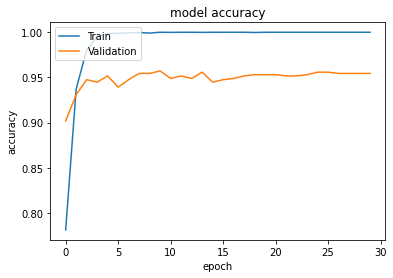

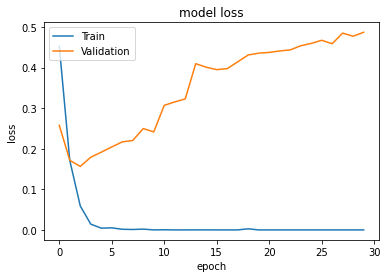

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Simple RNN with Fast Text**

In [ ]:
path_to_fastText_file = "/content/drive/MyDrive/ML_Assignments/wiki-news-300d-1M.vec"

embeddings_index = {}
with open(path_to_fastText_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 999995 word vectors.


In [ ]:
embedding_dim = 300

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Dense, SimpleRNN, Embedding
import keras
embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

In [ ]:
from keras.models import Sequential

fastText_model = Sequential()
fastText_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
fastText_model.add(layers.Bidirectional(SimpleRNN(32)))
fastText_model.add(Dense(128, activation='relu'))
fastText_model.add(Dense(64, activation='relu'))
fastText_model.add(Dense(32, activation='relu'))
fastText_model.add(Dense(1, activation='sigmoid'))

fastText_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = fastText_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = fastText_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Simple RNN FastText with 128 "

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 8s 97ms/step - loss: 0.4805 - acc: 0.7564 - val_loss: 0.2549 - val_acc: 0.9006
Epoch 2/30
51/51 [==============================] - 4s 88ms/step - loss: 0.1344 - acc: 0.9527 - val_loss: 0.1647 - val_acc: 0.9365
Epoch 3/30
51/51 [==============================] - 4s 86ms/step - loss: 0.0362 - acc: 0.9886 - val_loss: 0.2105 - val_acc: 0.9392
Epoch 4/30
51/51 [==============================] - 4s 86ms/step - loss: 0.0092 - acc: 0.9974 - val_loss: 0.3042 - val_acc: 0.9323
Epoch 5/30
51/51 [==============================] - 4s 87ms/step - loss: 0.0020 - acc: 0.9997 - val_loss: 0.2295 - val_acc: 0.9434
Epoch 6/30
51/51 [==============================] - 5s 88ms/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.2565 - val_acc: 0.9503
Epoch 7/30
51/51 [==============================] - 4s 88ms/step - loss: 9.2456e-04 - acc: 0.9997 - val_loss: 0.2918 - val_acc: 0.9489
Epoch 8/30
51/51 [==============================] - 5s 91ms/step - loss: 1.6384

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Simple RNN', 0.8942661756970016, 0.8891191709844559, 0.9012605042016807, 0.8951486697965572], ['Augmentation LSTM Glove with 128', 0.9522734601741374, 0.9498412698412698, 0.9559105431309904, 0.9528662420382166], ['Simple RNN Glove with 128', 0.9355046759109965, 0.952286282306163, 0.9182108626198083, 0.9349381912817176], ['Simple RNN FastText with 128 ', 0.9164785553047404, 0.9359145527369827, 0.8958466453674121, 0.9154423767548155]]


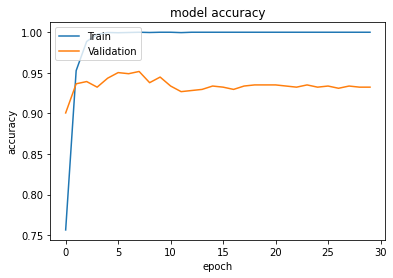

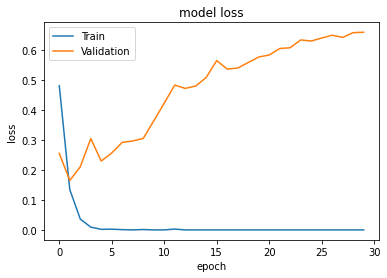

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**LSTM**

In [ ]:
from keras.layers import Dense 
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers

LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, maxlen))
LSTM_model.add(layers.Bidirectional(LSTM(32)))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(32, activation='relu'))
LSTM_model.add(Dense(1, activation='sigmoid'))

LSTM_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = LSTM_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = LSTM_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "LSTM"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)

Epoch 1/30
51/51 [==============================] - 19s 271ms/step - loss: 0.4217 - acc: 0.8057 - val_loss: 0.2069 - val_acc: 0.9185
Epoch 2/30
51/51 [==============================] - 12s 241ms/step - loss: 0.1748 - acc: 0.9376 - val_loss: 0.2401 - val_acc: 0.9075
Epoch 3/30
51/51 [==============================] - 13s 250ms/step - loss: 0.1138 - acc: 0.9611 - val_loss: 0.1458 - val_acc: 0.9503
Epoch 4/30
51/51 [==============================] - 13s 250ms/step - loss: 0.0757 - acc: 0.9748 - val_loss: 0.1729 - val_acc: 0.9475
Epoch 5/30
51/51 [==============================] - 13s 253ms/step - loss: 0.0450 - acc: 0.9837 - val_loss: 0.1464 - val_acc: 0.9544
Epoch 6/30
51/51 [==============================] - 13s 250ms/step - loss: 0.0266 - acc: 0.9923 - val_loss: 0.1746 - val_acc: 0.9503
Epoch 7/30
51/51 [==============================] - 12s 244ms/step - loss: 0.0127 - acc: 0.9962 - val_loss: 0.5179 - val_acc: 0.9061
Epoch 8/30
51/51 [==============================] - 13s 251ms/step - 

**loading performances**

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Simple RNN', 0.8942661756970016, 0.8891191709844559, 0.9012605042016807, 0.8951486697965572], ['Augmentation LSTM Glove with 128', 0.9522734601741374, 0.9498412698412698, 0.9559105431309904, 0.9528662420382166], ['Simple RNN Glove with 128', 0.9355046759109965, 0.952286282306163, 0.9182108626198083, 0.9349381912817176], ['Simple RNN FastText with 128 ', 0.9164785553047404, 0.9359145527369827, 0.8958466453674121, 0.9154423767548155], ['LSTM', 0.9474363108674622, 0.9397741530740276, 0.9571884984025559, 0.9484013928458372]]


**Visualization**

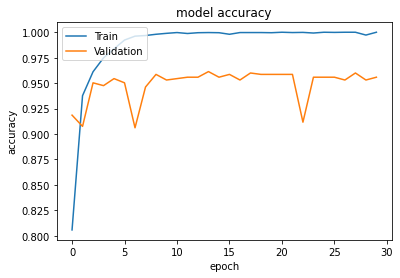

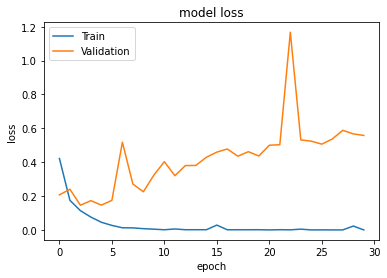

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**same predict method to detect news**

In [ ]:
def predict_news_status(txt, LSTM_model):
    txt = preprocess(txt) 
    txt = text_vectorization(pd.DataFrame([[txt]]))
    prob = LSTM_model.predict(txt)[0][0]
    print(prob)
    return 'Real' if prob >= 0.5 else 'Fake'

In [ ]:
news_str3 = '''

Pushed back on the implications of his approach, the finance minister acknowledged that he agreed with the potential fallout of a breakdown in IMF talks and said that was why he was talking to the body for the country’s sake.

“I know how to complete the [IMF] programme,” the finance minister maintained, stressing that the government would complete the current programme as well.

Dar said that in his talks with the IMF, he told the Fund that it should strike deals keeping in mind that the government could not further burden the people. Dar said he had told the IMF that it was “behaving abnormally” in regard to dealing with Pakistan.

“I have never taken dictation and never will from these institutions, I have to look after Pakistan’s interests,” the finance minister reiterated.

Regarding the general level of Pakistan’s foreign reserves and the risk of default, Dar said the government had made arrangements for all its liabilities for the fiscal year and would make all payments.

He also said that the government was currently in talks with an allied country for a deposit of $3bn, adding that there was a “positive understanding” present and Pakistan would definitely receive the funds.

“This is a matter of two weeks [for the amount to arrive],” he added.

Dar also rebuked former finance minister Miftah Ismail for his recent comments about the country’s risk of default and said he should be questioned about his six-month performance and where he left the level of foreign reserves.

“He is a nonentity for me on this subject,” Dar said.

Govt struggles for $1.18bn tranche
Amid time running out, the IMF is still analysing Pakistan’s fiscal position particularly the flood-related expenditures that it viewed had changed the macroeconomic assumptions of the fund programme.

The “IMF understands that the floods have changed the macroeconomic assumptions on which the programme was designed; therefore detailed analysis is being conducted by their team using the data provided”, the Ministry of Finance had said in response to a media query on the delay in the ninth review.

The two sides had been virtually engaged for more than a month now in attempts to conclude the ninth review in November so that the next tranche of about $1.18 billion could be approved by the IMF’s executive board and disbursed before Christman and new year holidays. The policy level discussions are yet to be finalised although the finance ministry had said the “IMF team is expected to visit Islamabad soon for completion of the 9th review”.

Under the normal mechanism, the fund staff mission has to reach an agreement with authorities on programme implementation and then required at least a fortnight for the board members to hold a meeting based on staff agreement. A further delay would mean the unavailability of the IMF executive board until the first week of January.

Pakistan’s foreign exchange reserves in the meanwhile are critically low and the central bank authorities have been rationing dollar releases even for essential imports like crude and petroleum products.
'''

In [ ]:
str1 = news_str3
# str1 = [str]
predict_news_status(str1,LSTM_model)

1/1 [==============================] - 0s 30ms/step
1.0


'Real'

**Glove with LSTM**

In [ ]:
path_to_glove_file = "/content/drive/MyDrive/ML_Assignments/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 400000 word vectors.


In [ ]:

embedding_dim = 100


word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Dense, LSTM, Embedding
import keras
embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

In [ ]:
LSTM_glove_model = Sequential()
LSTM_glove_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
LSTM_glove_model.add(layers.Bidirectional(LSTM(32)))
LSTM_glove_model.add(Dense(128, activation='relu'))
LSTM_glove_model.add(Dense(64, activation='relu'))
LSTM_glove_model.add(Dense(32, activation='relu'))
LSTM_glove_model.add(Dense(1, activation='sigmoid'))

LSTM_glove_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = LSTM_glove_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = LSTM_glove_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "LSTM Glove with 128"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 19s 272ms/step - loss: 0.4083 - acc: 0.8186 - val_loss: 0.2310 - val_acc: 0.9144
Epoch 2/30
51/51 [==============================] - 13s 247ms/step - loss: 0.1709 - acc: 0.9332 - val_loss: 0.2003 - val_acc: 0.9254
Epoch 3/30
51/51 [==============================] - 14s 272ms/step - loss: 0.1124 - acc: 0.9601 - val_loss: 0.1999 - val_acc: 0.9378
Epoch 4/30
51/51 [==============================] - 15s 285ms/step - loss: 0.0839 - acc: 0.9719 - val_loss: 0.1606 - val_acc: 0.9448
Epoch 5/30
51/51 [==============================] - 13s 250ms/step - loss: 0.0514 - acc: 0.9840 - val_loss: 0.2070 - val_acc: 0.9461
Epoch 6/30
51/51 [==============================] - 13s 247ms/step - loss: 0.0401 - acc: 0.9873 - val_loss: 0.2017 - val_acc: 0.9503
Epoch 7/30
51/51 [==============================] - 12s 243ms/step - loss: 0.0153 - acc: 0.9955 - val_loss: 0.2594 - val_acc: 0.9517
Epoch 8/30
51/51 [==============================] - 13s 246ms/step - 

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Simple RNN', 0.8942661756970016, 0.8891191709844559, 0.9012605042016807, 0.8951486697965572], ['Augmentation LSTM Glove with 128', 0.9522734601741374, 0.9498412698412698, 0.9559105431309904, 0.9528662420382166], ['Simple RNN Glove with 128', 0.9355046759109965, 0.952286282306163, 0.9182108626198083, 0.9349381912817176], ['Simple RNN FastText with 128 ', 0.9164785553047404, 0.9359145527369827, 0.8958466453674121, 0.9154423767548155], ['LSTM', 0.9474363108674622, 0.9397741530740276, 0.9571884984025559, 0.9484013928458372], ['LSTM Glove with 128', 0.946146404385682, 0.948076923076923, 0.9450479233226837, 0.94656]]


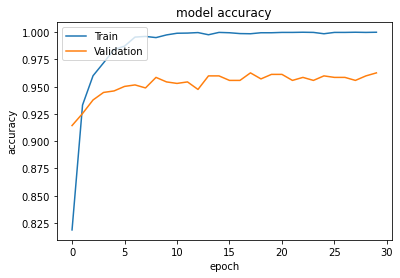

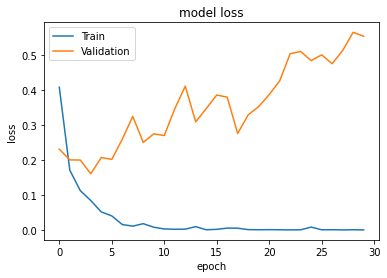

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Fast text with LSTM**

In [ ]:
path_to_fastText_file = "/content/drive/MyDrive/ML_Assignments/wiki-news-300d-1M.vec"

embeddings_index = {}
with open(path_to_fastText_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 999995 word vectors.


In [ ]:

embedding_dim = 300


word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Dense, LSTM, Embedding
import keras
embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

In [ ]:
from keras.models import Sequential

LSTM_fastText_model = Sequential()
LSTM_fastText_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
LSTM_fastText_model.add(layers.Bidirectional(LSTM(32)))
LSTM_fastText_model.add(Dense(128, activation='relu'))
LSTM_fastText_model.add(Dense(64, activation='relu'))
LSTM_fastText_model.add(Dense(32, activation='relu'))
LSTM_fastText_model.add(Dense(1, activation='sigmoid'))

LSTM_fastText_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = LSTM_fastText_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = LSTM_fastText_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "LSTM FastText with 128 "

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 23s 277ms/step - loss: 0.4068 - acc: 0.8175 - val_loss: 0.2192 - val_acc: 0.9102
Epoch 2/30
51/51 [==============================] - 13s 258ms/step - loss: 0.1715 - acc: 0.9389 - val_loss: 0.2085 - val_acc: 0.9171
Epoch 3/30
51/51 [==============================] - 13s 252ms/step - loss: 0.1130 - acc: 0.9598 - val_loss: 0.1753 - val_acc: 0.9378
Epoch 4/30
51/51 [==============================] - 13s 258ms/step - loss: 0.0737 - acc: 0.9765 - val_loss: 0.1867 - val_acc: 0.9434
Epoch 5/30
51/51 [==============================] - 13s 256ms/step - loss: 0.0469 - acc: 0.9854 - val_loss: 0.4516 - val_acc: 0.8950
Epoch 6/30
51/51 [==============================] - 13s 254ms/step - loss: 0.0316 - acc: 0.9902 - val_loss: 0.2238 - val_acc: 0.9503
Epoch 7/30
51/51 [==============================] - 17s 327ms/step - loss: 0.0167 - acc: 0.9955 - val_loss: 0.2970 - val_acc: 0.9420
Epoch 8/30
51/51 [==============================] - 13s 254ms/step - 

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Simple RNN', 0.8942661756970016, 0.8891191709844559, 0.9012605042016807, 0.8951486697965572], ['Augmentation LSTM Glove with 128', 0.9522734601741374, 0.9498412698412698, 0.9559105431309904, 0.9528662420382166], ['Simple RNN Glove with 128', 0.9355046759109965, 0.952286282306163, 0.9182108626198083, 0.9349381912817176], ['Simple RNN FastText with 128 ', 0.9164785553047404, 0.9359145527369827, 0.8958466453674121, 0.9154423767548155], ['LSTM', 0.9474363108674622, 0.9397741530740276, 0.9571884984025559, 0.9484013928458372], ['LSTM Glove with 128', 0.946146404385682, 0.948076923076923, 0.9450479233226837, 0.94656], ['LSTM FastText with 128 ', 0.9500161238310223, 0.9462025316455697, 0.9552715654952076, 0.9507154213036566]]


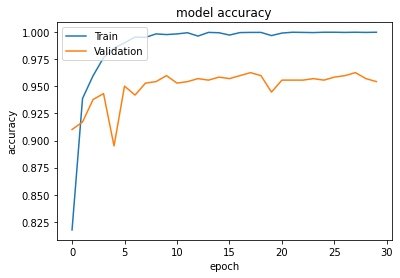

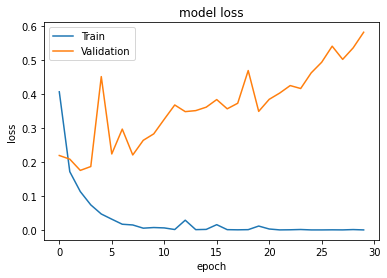

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**BERT model**

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 182 kB 54.2 MB/s 
     |████████████████████████████████| 7.6 MB 35.2 MB/s 


In [ ]:
Y = dataset1["label"].values
X = dataset1["text"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size = 0.3, random_state =1)

In [ ]:
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text-layer')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
d_layer = tf.keras.layers.Dense(128, name="dense-layer1")(outputs['pooled_output'])
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer1")(d_layer)
d_layer = tf.keras.layers.Dense(64, name="dense-layer2")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer2")(d_layer)
d_layer = tf.keras.layers.Dense(32, name="dense-layer3")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer3")(d_layer)
d_layer = tf.keras.layers.Dense(16, name="dense-layer4")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer4")(d_layer)
d_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(d_layer)
Bert_model = tf.keras.Model(inputs=[text_input], outputs = [d_layer])

In [ ]:
Bert_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text-layer (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text-layer[0][0]']             
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:

Bert_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=4,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [ ]:
history = Bert_model.fit(X_train, y_train, epochs=20, batch_size=800,
                    validation_split = 0.1)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Bert_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = " Bert Model "

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/20
5/5 [==============================] - 132s 27s/step - loss: 2.1050 - acc: 0.5058 - val_loss: 0.7410 - val_acc: 0.5541
Epoch 2/20
5/5 [==============================] - 133s 27s/step - loss: 0.7446 - acc: 0.5805 - val_loss: 0.6429 - val_acc: 0.6441
Epoch 3/20
5/5 [==============================] - 142s 29s/step - loss: 0.7318 - acc: 0.5584 - val_loss: 0.6933 - val_acc: 0.5541
Epoch 4/20
5/5 [==============================] - 132s 27s/step - loss: 0.7311 - acc: 0.5727 - val_loss: 0.6435 - val_acc: 0.6419
Epoch 5/20
5/5 [==============================] - 135s 28s/step - loss: 0.7203 - acc: 0.5727 - val_loss: 0.7697 - val_acc: 0.5270
Epoch 6/20
5/5 [==============================] - 134s 27s/step - loss: 0.7116 - acc: 0.5892 - val_loss: 0.6280 - val_acc: 0.6509
Epoch 7/20
5/5 [==============================] - 131s 27s/step - loss: 0.6608 - acc: 0.6113 - val_loss: 0.6307 - val_acc: 0.5901
Epoch 8/20
5/5 [==============================] - 133s 27s/step - loss: 0.7325 - acc: 0.56

**visualize  the bert model**

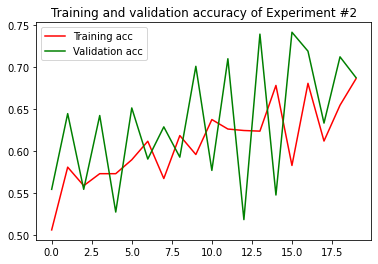

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #2')
plt.legend()

plt.figure()
plt.show()


**Text Data Augmentation**

In [ ]:
df = dataset1.iloc[:, [2,3]]
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1
...,...,...
6330,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [ ]:
! pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.0 MB/s 


In [ ]:
import nlpaug.augmenter.word as naw
import tqdm
#import shuffle
import random


**augmentation on simple text fro model bert**

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")
augmented_text = aug.augment("The quick brown fox jumps over the lazy dog")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
augmented_text

['the greedy quick female brown fox jumps over the lazy male dog']

**augmentation on simple text with glove **

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet', model_path='/content/drive/MyDrive/ML_Assignments/glove.6B.100d.txt', name='Synonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', 
                     stopwords=None, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, force_reload=False, 
                     verbose=0)
 
test_sentence_aug = aug.augment("All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected")
print(test_sentence_aug)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


["All residents ask to ' tax shelter in place ' are being advise by officers. No other evacuation operating room shelter in position order are expected"]


**Applying Text Augmentation on given dataset 4000 samples**

In [ ]:

def augment_text1(dataset1 , samples = 4000 ):
    
    new_text=[]
    new_label = []

    ##selecting the minority class samples
    

    ## data augmentation loop
    for i in (np.random.randint(0, 6000 , samples )):
            text = dataset1.iloc[i]['text']
            label = dataset1.iloc[i]['label']
            augmented_text = aug.augment(text)
            new_text += augmented_text
            new_label.append(label)

    ## dataframe
    new=pd.DataFrame({'text':new_text,'label':new_label})
    #df=shuffle(df.append(new).reset_index(drop=True))
    return new

df1 = augment_text1(df)

In [ ]:
df1["label"].value_counts()

1    2005
0    1995
Name: label, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4000 non-null   object
 1   label   4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


**Augmentated daataframe **

In [ ]:
df1


,text,label
0,Email Ever wonder what ’ s on the mind of toda...,0
1,« on: Today at 08: 36: 35 PM » AIG Quadruples ...,0
2,This post was originally published on this sit...,0
3,EU UN Secretary - General Ban Ki - moon (C) me...,0
4,"Share This Abdul Barati, a 43 - yera - old Afg...",0
...,...,...
3995,Obama ' s immigration initiative could protect...,1
3996,More Iranian troops have arrived in Syria for ...,1
3997,"Email It is especially painful for me, as an e...",0
3998,The crowd gathered in the streets outside the ...,1


**Merge augmented and given dataset**

In [ ]:
df3 = pd.concat([df,df1], axis = 0)
df3

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1
...,...,...
3995,Obama ' s immigration initiative could protect...,1
3996,More Iranian troops have arrived in Syria for ...,1
3997,"Email It is especially painful for me, as an e...",0
3998,The crowd gathered in the streets outside the ...,1


In [ ]:
df3

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1
...,...,...
3995,Obama ' s immigration initiative could protect...,1
3996,More Iranian troops have arrived in Syria for ...,1
3997,"Email It is especially painful for me, as an e...",0
3998,The crowd gathered in the streets outside the ...,1


In [ ]:
df3['text'] = df3['text'].apply(preprocess)

In [ ]:
label = df3["label"].values
txt = df3["text"]

In [ ]:
df3.shape

(10335, 2)

In [ ]:
# 3.2
max_features = 2000
maxlen = 100

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(txt, label, test_size=0.3, random_state=1, stratify=label)

In [ ]:
from tensorflow.keras import layers
text_vectorization = layers.TextVectorization (max_tokens=max_features, output_mode="int", output_sequence_length=maxlen)
text_vectorization.adapt(txt)
X_train = text_vectorization(X_train)
X_test = text_vectorization(X_test)

In [ ]:
print(len(X_train))
print(len(X_test))
print(y_train)
print(y_test)

7234
3101
[0 1 0 ... 1 0 0]
[1 0 1 ... 0 1 0]


**Augmented LSTM**

In [ ]:
from keras.layers import Dense 
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers

Aug_LSTM_model = Sequential()
Aug_LSTM_model.add(Embedding(max_features, maxlen))
Aug_LSTM_model.add(layers.Bidirectional(LSTM(32)))
Aug_LSTM_model.add(Dense(128, activation='relu'))
Aug_LSTM_model.add(Dense(64, activation='relu'))
Aug_LSTM_model.add(Dense(32, activation='relu'))
Aug_LSTM_model.add(Dense(1, activation='sigmoid'))

Aug_LSTM_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = Aug_LSTM_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Aug_LSTM_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = " Augmented LSTM"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)

Epoch 1/30
51/51 [==============================] - 25s 412ms/step - loss: 0.4007 - acc: 0.8241 - val_loss: 0.2330 - val_acc: 0.9199
Epoch 2/30
51/51 [==============================] - 24s 465ms/step - loss: 0.1664 - acc: 0.9390 - val_loss: 0.1707 - val_acc: 0.9365
Epoch 3/30
51/51 [==============================] - 21s 406ms/step - loss: 0.1086 - acc: 0.9624 - val_loss: 0.1789 - val_acc: 0.9337
Epoch 4/30
51/51 [==============================] - 14s 266ms/step - loss: 0.0711 - acc: 0.9750 - val_loss: 0.1908 - val_acc: 0.9337
Epoch 5/30
51/51 [==============================] - 11s 223ms/step - loss: 0.0413 - acc: 0.9846 - val_loss: 0.1531 - val_acc: 0.9530
Epoch 6/30
51/51 [==============================] - 11s 222ms/step - loss: 0.0213 - acc: 0.9932 - val_loss: 0.1842 - val_acc: 0.9517
Epoch 7/30
51/51 [==============================] - 11s 223ms/step - loss: 0.0120 - acc: 0.9962 - val_loss: 0.2011 - val_acc: 0.9558
Epoch 8/30
51/51 [==============================] - 11s 224ms/step - 

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Augmentation Bert ', 0.7381489841986456, 0.831304347826087, 0.6073697585768743, 0.7019089574155652], [' Bert Model ', 0.6870068385060495, 0.8789808917197452, 0.43487394957983194, 0.5818692902319044], ['Augmentation LSTM Fast txt with 128', 0.945501451144792, 0.936064556176288, 0.9580686149936467, 0.9469387755102041], [' Augmented LSTM', 0.9496936472105773, 0.9420199501246883, 0.9599745870393901, 0.9509125235997483]]


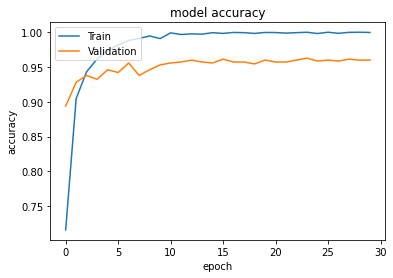

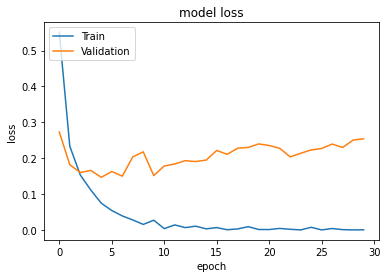

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Augmented LSTM with Fast Text**

In [ ]:
path_to_fastTxt_file = "/content/drive/MyDrive/ML_Assignments/wiki-news-300d-1M.vec"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 999995 word vectors.


In [ ]:

embedding_dim = 300
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
Aug_LSTM_fastTxt_model = Sequential()
Aug_LSTM_fastTxt_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
Aug_LSTM_fastTxt_model.add(layers.Bidirectional(LSTM(32)))
Aug_LSTM_fastTxt_model.add(Dense(128, activation='relu'))
Aug_LSTM_fastTxt_model.add(Dense(64, activation='relu'))
Aug_LSTM_fastTxt_model.add(Dense(32, activation='relu'))
Aug_LSTM_fastTxt_model.add(Dense(1, activation='sigmoid'))

Aug_LSTM_fastTxt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = Aug_LSTM_fastTxt_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Aug_LSTM_fastTxt_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Augmentation LSTM Fast txt with 128"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 14s 137ms/step - loss: 0.6014 - acc: 0.6831 - val_loss: 0.3749 - val_acc: 0.8564
Epoch 2/30
51/51 [==============================] - 3s 60ms/step - loss: 0.2551 - acc: 0.8978 - val_loss: 0.2040 - val_acc: 0.9296
Epoch 3/30
51/51 [==============================] - 3s 68ms/step - loss: 0.1522 - acc: 0.9450 - val_loss: 0.1695 - val_acc: 0.9365
Epoch 4/30
51/51 [==============================] - 2s 39ms/step - loss: 0.0980 - acc: 0.9668 - val_loss: 0.1842 - val_acc: 0.9392
Epoch 5/30
51/51 [==============================] - 2s 49ms/step - loss: 0.0669 - acc: 0.9767 - val_loss: 0.1400 - val_acc: 0.9517
Epoch 6/30
51/51 [==============================] - 2s 31ms/step - loss: 0.0427 - acc: 0.9859 - val_loss: 0.1339 - val_acc: 0.9475
Epoch 7/30
51/51 [==============================] - 1s 27ms/step - loss: 0.0209 - acc: 0.9931 - val_loss: 0.1496 - val_acc: 0.9544
Epoch 8/30
51/51 [==============================] - 2s 31ms/step - loss: 0.0136 -

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Augmentation Bert ', 0.7381489841986456, 0.831304347826087, 0.6073697585768743, 0.7019089574155652], [' Bert Model ', 0.6870068385060495, 0.8789808917197452, 0.43487394957983194, 0.5818692902319044], ['Augmentation LSTM Fast txt with 128', 0.945501451144792, 0.936064556176288, 0.9580686149936467, 0.9469387755102041]]


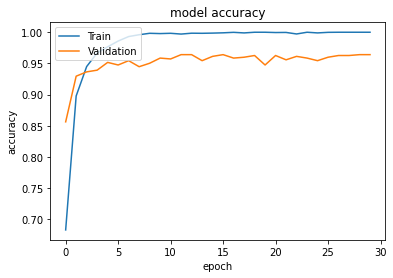

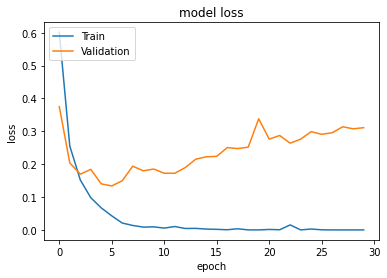

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Augmentation  with LSTM_glove**

In [ ]:
path_to_glove_file = "/content/drive/MyDrive/ML_Assignments/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 400000 word vectors.


In [ ]:

embedding_dim = 100
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Dense, LSTM, Embedding
import keras
embedding_layer = layers.Embedding(
    max_features,
    embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

In [ ]:
Aug_LSTM_glove_model = Sequential()
Aug_LSTM_glove_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
Aug_LSTM_glove_model.add(layers.Bidirectional(LSTM(32)))
Aug_LSTM_glove_model.add(Dense(128, activation='relu'))
Aug_LSTM_glove_model.add(Dense(64, activation='relu'))
Aug_LSTM_glove_model.add(Dense(32, activation='relu'))
Aug_LSTM_glove_model.add(Dense(1, activation='sigmoid'))

Aug_LSTM_glove_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = Aug_LSTM_glove_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

Aug_LSTM_glove_model.save_weights("/content/drive/MyDrive/Colab Notebooks/aug_model.hdf5")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Aug_LSTM_glove_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Augmentation LSTM Glove with 128"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 17s 240ms/step - loss: 0.4075 - acc: 0.8184 - val_loss: 0.2378 - val_acc: 0.9144
Epoch 2/30
51/51 [==============================] - 11s 220ms/step - loss: 0.1740 - acc: 0.9375 - val_loss: 0.2020 - val_acc: 0.9213
Epoch 3/30
51/51 [==============================] - 11s 220ms/step - loss: 0.1250 - acc: 0.9575 - val_loss: 0.2276 - val_acc: 0.9102
Epoch 4/30
51/51 [==============================] - 11s 221ms/step - loss: 0.0888 - acc: 0.9696 - val_loss: 0.1695 - val_acc: 0.9392
Epoch 5/30
51/51 [==============================] - 11s 217ms/step - loss: 0.0588 - acc: 0.9800 - val_loss: 0.1675 - val_acc: 0.9489
Epoch 6/30
51/51 [==============================] - 11s 221ms/step - loss: 0.0376 - acc: 0.9860 - val_loss: 0.1804 - val_acc: 0.9448
Epoch 7/30
51/51 [==============================] - 11s 220ms/step - loss: 0.0234 - acc: 0.9923 - val_loss: 0.2361 - val_acc: 0.9448
Epoch 8/30
51/51 [==============================] - 11s 220ms/step - 

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Augmentation LSTM Glove with 128', 0.9542083198968074, 0.9513755598208573, 0.9575016097875081, 0.9544287548138639]]


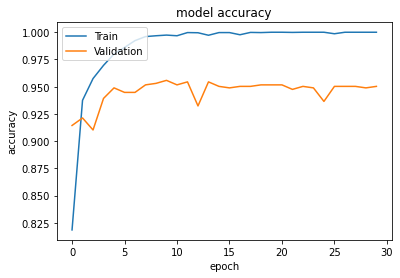

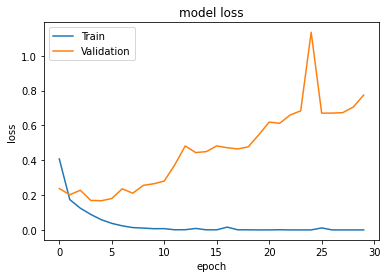

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def predict_news_status(txt, Aug_LSTM_glove_model):
    txt = preprocess(txt) 
    txt = text_vectorization(pd.DataFrame([[txt]]))
    prob = Aug_LSTM_glove_model.predict(txt)[0][0]
    print(prob)
    return 'Real' if prob >= 0.5 else 'Fake'

In [ ]:
news_st = '''

Pushed back on the implications of his approach, the finance minister acknowledged that he agreed with the potential fallout of a breakdown in IMF talks and said that was why he was talking to the body for the country’s sake.

“I know how to complete the [IMF] programme,” the finance minister maintained, stressing that the government would complete the current programme as well.

Dar said that in his talks with the IMF, he told the Fund that it should strike deals keeping in mind that the government could not further burden the people. Dar said he had told the IMF that it was “behaving abnormally” in regard to dealing with Pakistan.

“I have never taken dictation and never will from these institutions, I have to look after Pakistan’s interests,” the finance minister reiterated.

Regarding the general level of Pakistan’s foreign reserves and the risk of default, Dar said the government had made arrangements for all its liabilities for the fiscal year and would make all payments.

He also said that the government was currently in talks with an allied country for a deposit of $3bn, adding that there was a “positive understanding” present and Pakistan would definitely receive the funds.

“This is a matter of two weeks [for the amount to arrive],” he added.

Dar also rebuked former finance minister Miftah Ismail for his recent comments about the country’s risk of default and said he should be questioned about his six-month performance and where he left the level of foreign reserves.

“He is a nonentity for me on this subject,” Dar said.

Govt struggles for $1.18bn tranche
Amid time running out, the IMF is still analysing Pakistan’s fiscal position particularly the flood-related expenditures that it viewed had changed the macroeconomic assumptions of the fund programme.

The “IMF understands that the floods have changed the macroeconomic assumptions on which the programme was designed; therefore detailed analysis is being conducted by their team using the data provided”, the Ministry of Finance had said in response to a media query on the delay in the ninth review.

The two sides had been virtually engaged for more than a month now in attempts to conclude the ninth review in November so that the next tranche of about $1.18 billion could be approved by the IMF’s executive board and disbursed before Christman and new year holidays. The policy level discussions are yet to be finalised although the finance ministry had said the “IMF team is expected to visit Islamabad soon for completion of the 9th review”.

Under the normal mechanism, the fund staff mission has to reach an agreement with authorities on programme implementation and then required at least a fortnight for the board members to hold a meeting based on staff agreement. A further delay would mean the unavailability of the IMF executive board until the first week of January.

Pakistan’s foreign exchange reserves in the meanwhile are critically low and the central bank authorities have been rationing dollar releases even for essential imports like crude and petroleum products.
'''

In [ ]:
str4 = news_st
# str1 = [str]
predict_news_status(str4, Aug_LSTM_glove_model)

1/1 [==============================] - 0s 25ms/step
1.0


'Real'

**Augmented RNN**

In [ ]:
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers

Aug_RNN_model = Sequential()
Aug_RNN_model.add(Embedding(max_features, maxlen))
Aug_RNN_model.add(layers.Bidirectional(RNN(32)))
Aug_RNN_model.add(Dense(128, activation='relu'))
Aug_RNN_model.add(Dense(64, activation='relu'))
Aug_RNN_model.add(Dense(32, activation='relu'))
Aug_RNN_model.add(Dense(1, activation='sigmoid'))

Aug_RNN_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = Aug_RNN_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Aug_RNN_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = " Augmented RNN"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)

Epoch 1/30
51/51 [==============================] - 9s 100ms/step - loss: 0.5239 - acc: 0.7485 - val_loss: 0.2425 - val_acc: 0.9075
Epoch 2/30
51/51 [==============================] - 3s 53ms/step - loss: 0.2212 - acc: 0.9158 - val_loss: 0.1786 - val_acc: 0.9199
Epoch 3/30
51/51 [==============================] - 2s 38ms/step - loss: 0.1457 - acc: 0.9484 - val_loss: 0.1494 - val_acc: 0.9392
Epoch 4/30
51/51 [==============================] - 2s 32ms/step - loss: 0.1022 - acc: 0.9657 - val_loss: 0.1723 - val_acc: 0.9378
Epoch 5/30
51/51 [==============================] - 1s 26ms/step - loss: 0.0708 - acc: 0.9771 - val_loss: 0.1499 - val_acc: 0.9448
Epoch 6/30
51/51 [==============================] - 1s 25ms/step - loss: 0.0442 - acc: 0.9873 - val_loss: 0.1958 - val_acc: 0.9282
Epoch 7/30
51/51 [==============================] - 1s 21ms/step - loss: 0.0387 - acc: 0.9877 - val_loss: 0.1308 - val_acc: 0.9530
Epoch 8/30
51/51 [==============================] - 1s 26ms/step - loss: 0.0234 - 

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Augmentation Bert ', 0.7381489841986456, 0.831304347826087, 0.6073697585768743, 0.7019089574155652], [' Bert Model ', 0.6870068385060495, 0.8789808917197452, 0.43487394957983194, 0.5818692902319044], ['Augmentation LSTM Fast txt with 128', 0.945501451144792, 0.936064556176288, 0.9580686149936467, 0.9469387755102041], [' Augmented LSTM', 0.9496936472105773, 0.9420199501246883, 0.9599745870393901, 0.9509125235997483], [' Augmented RNN', 0.9471138342470171, 0.9422835633626098, 0.9542566709021602, 0.9482323232323233]]


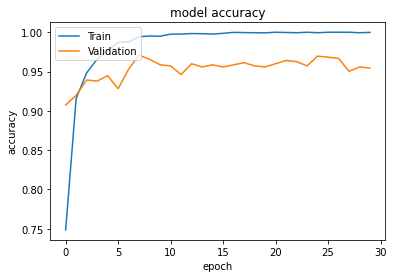

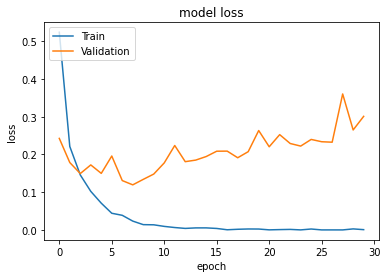

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Augmented RNN With Fast Text**

In [ ]:
path_to_fastTxt_file = "/content/drive/MyDrive/ML_Assignments/wiki-news-300d-1M.vec"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 999995 word vectors.


In [ ]:

embedding_dim = 300
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
Aug_RNN_fastTxt_model = Sequential()
Aug_RNN_fastTxt_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
Aug_RNN_fastTxt_model.add(layers.Bidirectional(SimpleRNN(32)))
Aug_RNN_fastTxt_model.add(Dense(128, activation='relu'))
Aug_RNN_fastTxt_model.add(Dense(64, activation='relu'))
Aug_RNN_fastTxt_model.add(Dense(32, activation='relu'))
Aug_RNN_fastTxt_model.add(Dense(1, activation='sigmoid'))

Aug_RNN_fastTxt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = Aug_RNN_fastTxt_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Aug_RNN_fastTxt_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Augmentation RNN Fast txt with 128"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 9s 101ms/step - loss: 0.5320 - acc: 0.7347 - val_loss: 0.2638 - val_acc: 0.8964
Epoch 2/30
51/51 [==============================] - 3s 59ms/step - loss: 0.2373 - acc: 0.9101 - val_loss: 0.1850 - val_acc: 0.9254
Epoch 3/30
51/51 [==============================] - 2s 44ms/step - loss: 0.1399 - acc: 0.9485 - val_loss: 0.1718 - val_acc: 0.9323
Epoch 4/30
51/51 [==============================] - 1s 24ms/step - loss: 0.1066 - acc: 0.9618 - val_loss: 0.1825 - val_acc: 0.9365
Epoch 5/30
51/51 [==============================] - 1s 21ms/step - loss: 0.0698 - acc: 0.9751 - val_loss: 0.1508 - val_acc: 0.9448
Epoch 6/30
51/51 [==============================] - 1s 27ms/step - loss: 0.0471 - acc: 0.9826 - val_loss: 0.1432 - val_acc: 0.9475
Epoch 7/30
51/51 [==============================] - 1s 23ms/step - loss: 0.0288 - acc: 0.9914 - val_loss: 0.1671 - val_acc: 0.9461
Epoch 8/30
51/51 [==============================] - 1s 25ms/step - loss: 0.0173 - 

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Augmentation Bert ', 0.7381489841986456, 0.831304347826087, 0.6073697585768743, 0.7019089574155652], [' Bert Model ', 0.6870068385060495, 0.8789808917197452, 0.43487394957983194, 0.5818692902319044], ['Augmentation LSTM Fast txt with 128', 0.945501451144792, 0.936064556176288, 0.9580686149936467, 0.9469387755102041], [' Augmented LSTM', 0.9496936472105773, 0.9420199501246883, 0.9599745870393901, 0.9509125235997483], [' Augmented RNN', 0.9471138342470171, 0.9422835633626098, 0.9542566709021602, 0.9482323232323233], ['Augmentation RNN Fast txt with 128', 0.946468881006127, 0.9351050679851669, 0.9612452350698857, 0.9479949874686717]]


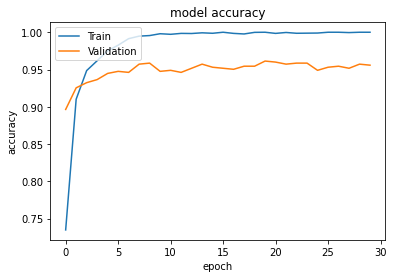

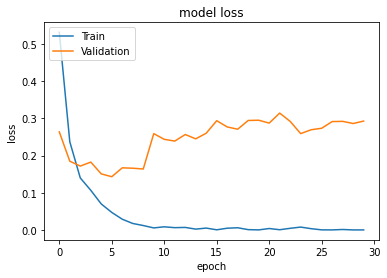

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Augmented RNN with Glove**

In [ ]:
path_to_glove_file = "/content/drive/MyDrive/ML_Assignments/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")



Found 400000 word vectors.


In [ ]:

embedding_dim = 100
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
Aug_RNN_glove_model = Sequential()
Aug_RNN_glove_model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
Aug_RNN_glove_model.add(layers.Bidirectional(SimpleRNN(32)))
Aug_RNN_glove_model.add(Dense(128, activation='relu'))
Aug_RNN_glove_model.add(Dense(64, activation='relu'))
Aug_RNN_glove_model.add(Dense(32, activation='relu'))
Aug_RNN_glove_model.add(Dense(1, activation='sigmoid'))

Aug_RNN_glove_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = Aug_RNN_glove_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Aug_RNN_glove_model.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Augmentation RNN Glove with 128"

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)


Epoch 1/30
51/51 [==============================] - 9s 102ms/step - loss: 0.5159 - acc: 0.7558 - val_loss: 0.2571 - val_acc: 0.9075
Epoch 2/30
51/51 [==============================] - 3s 62ms/step - loss: 0.2099 - acc: 0.9210 - val_loss: 0.1989 - val_acc: 0.9157
Epoch 3/30
51/51 [==============================] - 1s 27ms/step - loss: 0.1333 - acc: 0.9515 - val_loss: 0.1320 - val_acc: 0.9503
Epoch 4/30
51/51 [==============================] - 2s 30ms/step - loss: 0.0923 - acc: 0.9670 - val_loss: 0.2333 - val_acc: 0.9144
Epoch 5/30
51/51 [==============================] - 1s 25ms/step - loss: 0.0581 - acc: 0.9803 - val_loss: 0.1122 - val_acc: 0.9530
Epoch 6/30
51/51 [==============================] - 1s 28ms/step - loss: 0.0315 - acc: 0.9897 - val_loss: 0.8441 - val_acc: 0.8715
Epoch 7/30
51/51 [==============================] - 1s 19ms/step - loss: 0.0255 - acc: 0.9949 - val_loss: 0.1191 - val_acc: 0.9613
Epoch 8/30
51/51 [==============================] - 1s 25ms/step - loss: 0.0179 - 

In [ ]:
# 6
# To load performances list
performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

print(performances)

[['Augmentation Bert ', 0.7381489841986456, 0.831304347826087, 0.6073697585768743, 0.7019089574155652], [' Bert Model ', 0.6870068385060495, 0.8789808917197452, 0.43487394957983194, 0.5818692902319044], ['Augmentation LSTM Fast txt with 128', 0.945501451144792, 0.936064556176288, 0.9580686149936467, 0.9469387755102041], [' Augmented LSTM', 0.9496936472105773, 0.9420199501246883, 0.9599745870393901, 0.9509125235997483], [' Augmented RNN', 0.9471138342470171, 0.9422835633626098, 0.9542566709021602, 0.9482323232323233], ['Augmentation RNN Fast txt with 128', 0.946468881006127, 0.9351050679851669, 0.9612452350698857, 0.9479949874686717], ['Augmentation RNN Glove with 128', 0.9487262173492422, 0.9419113054341037, 0.9580686149936467, 0.9499212598425196]]


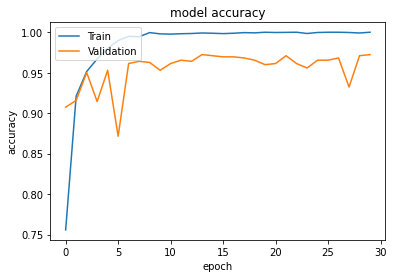

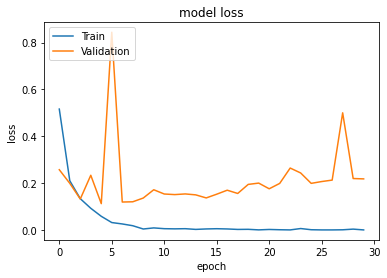

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Augmentation with Bert**

In [ ]:
Y_new = df3["label"].values
X_new = df3["text"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, stratify = Y_new, test_size = 0.3, random_state =1)

In [ ]:

import keras
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from nltk.stem import WordNetLemmatizer 
import string
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 32.2 MB/s 
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 439 kB 76.4 MB/s 
     |████████████████████████████████| 1.7 MB 59.9 MB/s 
     |████████████████████████████████| 6.0 MB 57.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text-layer')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
d_layer = tf.keras.layers.Dense(128, name="dense-layer1")(outputs['pooled_output'])
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer1")(d_layer)
d_layer = tf.keras.layers.Dense(64, name="dense-layer2")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer2")(d_layer)
d_layer = tf.keras.layers.Dense(32, name="dense-layer3")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer3")(d_layer)
d_layer = tf.keras.layers.Dense(16, name="dense-layer4")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer4")(d_layer)
d_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(d_layer)
Aug_Bertmodel = tf.keras.Model(inputs=[text_input], outputs = [d_layer])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
Aug_Bertmodel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text-layer (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text-layer[0][0]']             
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:

Aug_Bertmodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=4,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [ ]:
history = Aug_Bertmodel.fit(X_train, Y_train, epochs=20, batch_size=800,
                    validation_split = 0.1)


Epoch 1/20
9/9 [==============================] - 251s 27s/step - loss: 1.9452 - acc: 0.5241 - val_loss: 0.6440 - val_acc: 0.6423
Epoch 2/20
9/9 [==============================] - 219s 24s/step - loss: 0.8262 - acc: 0.5335 - val_loss: 0.6581 - val_acc: 0.6036
Epoch 3/20
9/9 [==============================] - 237s 27s/step - loss: 0.7023 - acc: 0.5724 - val_loss: 0.6753 - val_acc: 0.5635
Epoch 4/20
9/9 [==============================] - 240s 27s/step - loss: 0.7305 - acc: 0.5668 - val_loss: 0.6140 - val_acc: 0.6823
Epoch 5/20
9/9 [==============================] - 238s 27s/step - loss: 0.6973 - acc: 0.5965 - val_loss: 0.7943 - val_acc: 0.5207
Epoch 6/20
9/9 [==============================] - 219s 24s/step - loss: 0.6863 - acc: 0.6054 - val_loss: 0.6037 - val_acc: 0.7003
Epoch 7/20
9/9 [==============================] - 241s 27s/step - loss: 0.6929 - acc: 0.5880 - val_loss: 0.5964 - val_acc: 0.7058
Epoch 8/20
9/9 [==============================] - 238s 27s/step - loss: 0.7183 - acc: 0.61

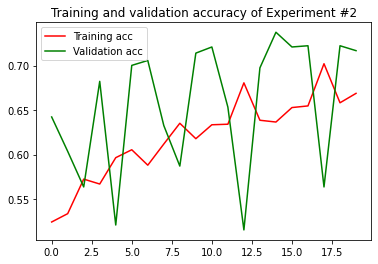

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #2')
plt.legend()

plt.figure()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predictions = Aug_Bertmodel.predict(X_test)
predictions = [round(prediction[0]) for prediction in predictions]

accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1_score: {f1}\n")

model_name = "Augmentation Bert "

performances.append([model_name, accuracy, precision, recall, f1])

with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'wb') as f:
  pickle.dump(performances, f)

97/97 [==============================] - 35s 361ms/step
Accuracy: 0.7381489841986456
Precision: 0.831304347826087
Recall: 0.6073697585768743
F1_score: 0.7019089574155652



**Results**

In [ ]:
import pandas as pd
import pickle 

performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

df = pd.DataFrame(performances)

df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
df

,Model,Accuracy,Precision,Recall,F1
0,Simple RNN,0.894266,0.889119,0.901261,0.895149
1,Augmentation LSTM Glove with 128,0.952273,0.949841,0.955911,0.952866
2,Simple RNN Glove with 128,0.935505,0.952286,0.918211,0.934938
3,Simple RNN FastText with 128,0.916479,0.935915,0.895847,0.915442
4,LSTM,0.947436,0.939774,0.957188,0.948401
5,LSTM Glove with 128,0.946146,0.948077,0.945048,0.946560
6,LSTM FastText with 128,0.950016,0.946203,0.955272,0.950715


In [ ]:
import pandas as pd
import pickle 

performances = []
with open('/content/drive/MyDrive/Colab Notebooks/performances.pickle', 'rb') as f:
  performances = pickle.load(f)

df = pd.DataFrame(performances)

df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
df

,Model,Accuracy,Precision,Recall,F1
0,Augmentation Bert,0.738149,0.831304,0.607370,0.701909
1,Bert Model,0.687007,0.878981,0.434874,0.581869
2,Augmentation LSTM Fast txt with 128,0.945501,0.936065,0.958069,0.946939
3,Augmented LSTM,0.949694,0.942020,0.959975,0.950913
4,Augmented RNN,0.947114,0.942284,0.954257,0.948232
5,Augmentation RNN Fast txt with 128,0.946469,0.935105,0.961245,0.947995
6,Augmentation RNN Glove with 128,0.948726,0.941911,0.958069,0.949921


In [1]:
from tabulate import tabulate
table = [['S.No:', 'Classifier', 'Accuracy:'], [1, 'Passive_Agressive_Classifier', 0.9163 ]]
print(tabulate(table))

-----  ----------------------------  ---------
S.No:  Classifier                    Accuracy:
1      Passive_Agressive_Classifier  0.9163
-----  ----------------------------  ---------
